In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

x, y = symbols('x y')

In [2]:
u = 5 * (x**2) - y**2
v = 4*y - (sin(x) + cos(y))

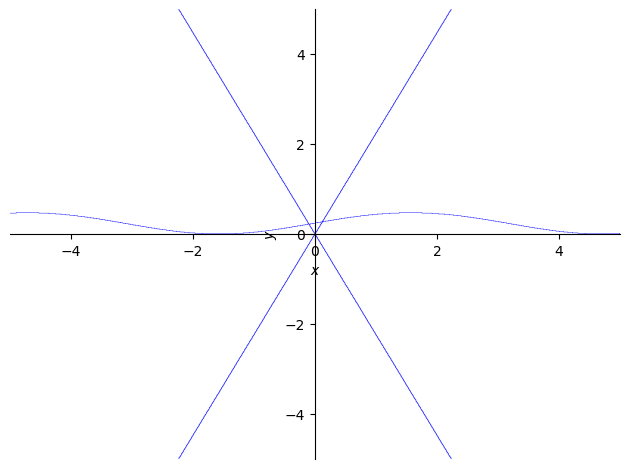

In [3]:
plot_implicit(u*v, (x, -5, 5), (y, -5, 5))

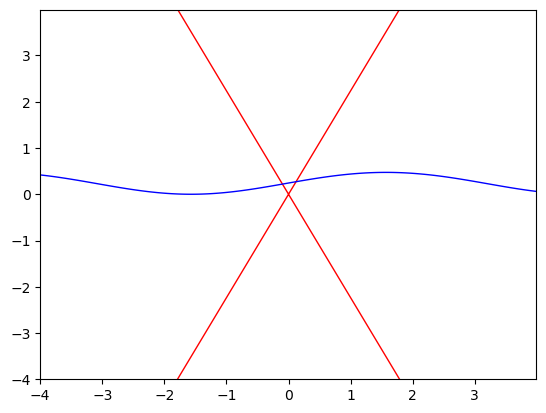

In [4]:
f1 = lambdify([x,y], u)
f2 = lambdify([x,y], v)

n= np.arange(-4, 4, 0.01)

Xs, Ys = np.meshgrid(n, n)

xs = f1(Xs, Ys)
ys = f2(Xs, Ys)

plt.contour(Xs, Ys, xs ,0, colors="red", linewidths=1)
plt.contour(Xs, Ys, ys ,0, colors="blue",  linewidths=1)
plt.show()

In [61]:
F = Matrix([u, v])
F.jacobian([x, y])

Matrix([
[   10*x,       -2*y],
[-cos(x), sin(y) + 4]])

In [6]:
p = Matrix([x, y])
G = p - F.jacobian([x, y]).inv() * F

In [62]:
print_latex(G)

\left[\begin{matrix}x - \frac{y \left(4 y - \sin{\left(x \right)} - \cos{\left(y \right)}\right)}{5 x \sin{\left(y \right)} + 20 x - y \cos{\left(x \right)}} - \frac{\left(5 x^{2} - y^{2}\right) \left(\sin{\left(y \right)} + 4\right)}{10 x \sin{\left(y \right)} + 40 x - 2 y \cos{\left(x \right)}}\\- \frac{5 x \left(4 y - \sin{\left(x \right)} - \cos{\left(y \right)}\right)}{5 x \sin{\left(y \right)} + 20 x - y \cos{\left(x \right)}} + y - \frac{\left(5 x^{2} - y^{2}\right) \cos{\left(x \right)}}{10 x \sin{\left(y \right)} + 40 x - 2 y \cos{\left(x \right)}}\end{matrix}\right]


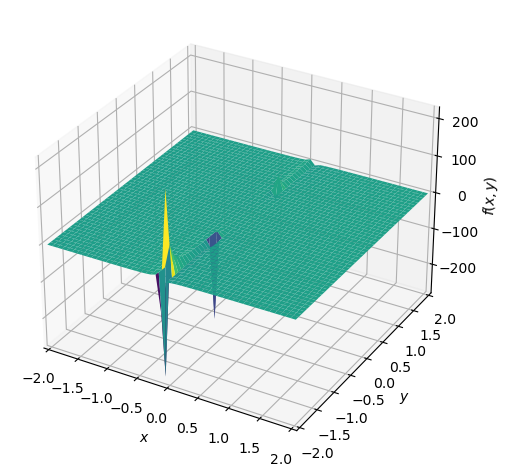

In [68]:
plot3d(G[0], (x, -2, 2), (y, -2, 2))

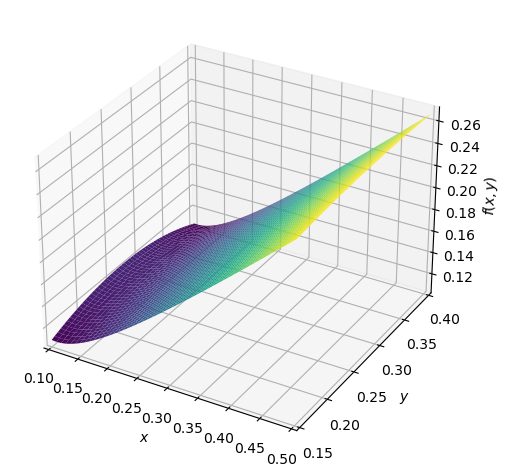

In [51]:
from sympy.plotting import plot3d
plot3d(G[0], (x, 0.1, 0.5), (y, 0.15, 0.4))

In [134]:
G[1].evalf(subs={x: 0.5, y:0.4})

0.308019300117039

In [135]:
G[1].evalf(subs={x: 0.1, y:0.15})

0.269773939190495

In [137]:
G[1].evalf(subs={x: 0.5, y:0.15})

0.309332351533845

In [138]:
G[1].evalf(subs={x:0.1, y:0.4})

0.269301171767957

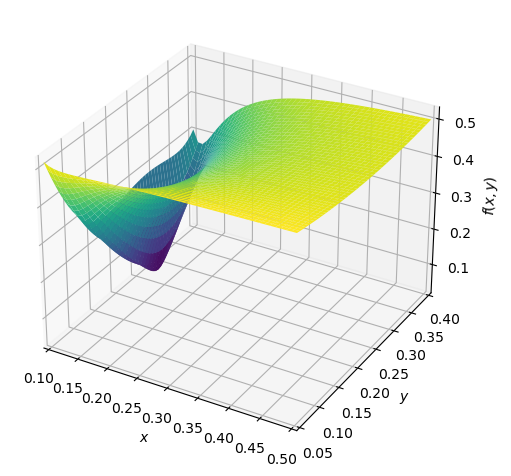

In [45]:
plot3d(G.jacobian([x,y]).norm('fro'), (x, 0.1, 0.5), (y, 0.05, 0.4))

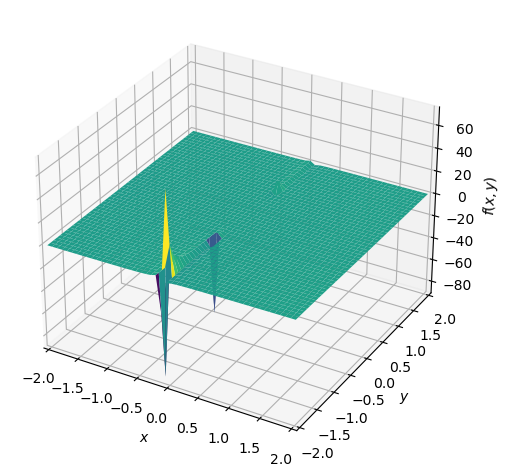

In [8]:
plot3d(G[1], (x, -2, 2), (y, -2, 2))

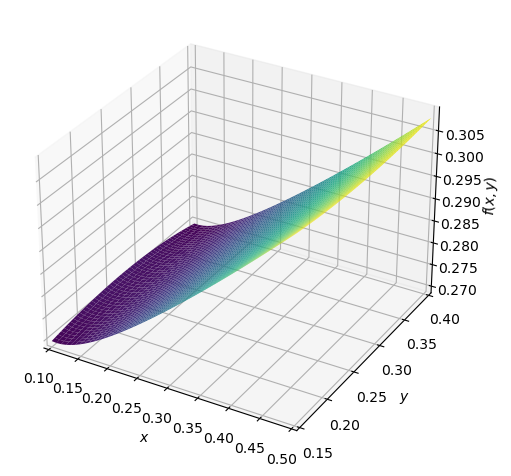

In [69]:
from sympy.plotting import plot3d

plot3d(G[1], (x, 0.1, 0.5), (y, 0.15, 0.4))

In [37]:
G[1].evalf(subs={x:0.05, y:0.05})

0.265248079849915

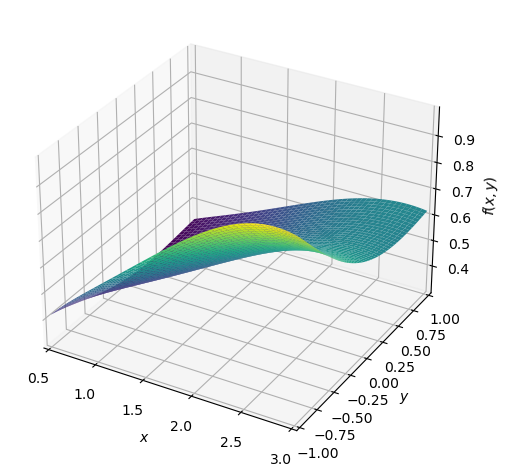

In [76]:
plot3d(G[1], (x, 0.5, 3), (y, -1, 1))

In [27]:
G1 = lambdify([x,y], G[0])
G2 = lambdify([x,y], G[1])

In [28]:
X, Y = np.meshgrid(np.arange(-2,2, 0.05),np.arange(-0.5, 0.5, 0.05))

a = G1(X, Y).flatten()
b = G2(X, Y).flatten()

In [58]:
G1(X, Y)

array([[-0.99051225, -0.96474879, -0.93893071, ...,  0.87544895,
         0.90116449,  0.92685595],
       [-0.99280668, -0.9671607 , -0.94146804, ...,  0.88233879,
         0.90794235,  0.93352598],
       [-0.99477838, -0.96923999, -0.94366225, ...,  0.88876865,
         0.91426969,  0.93975456],
       ...,
       [-0.99170298, -0.96678757, -0.94188429, ...,  0.93817295,
         0.96313688,  0.98809645],
       [-0.98969533, -0.96476813, -0.93985349, ...,  0.9389038 ,
         0.96388871,  0.98886736],
       [-0.98749596, -0.96255158, -0.93761989, ...,  0.93937586,
         0.96438781,  0.9893913 ]])

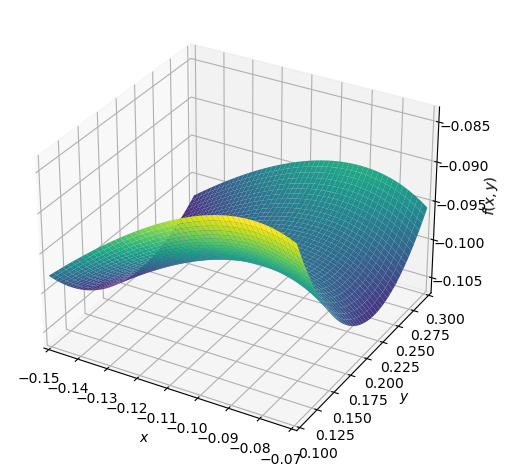

In [147]:
plot3d(G[0], (x, -0.15, -0.07), (y, 0.1, 0.3))

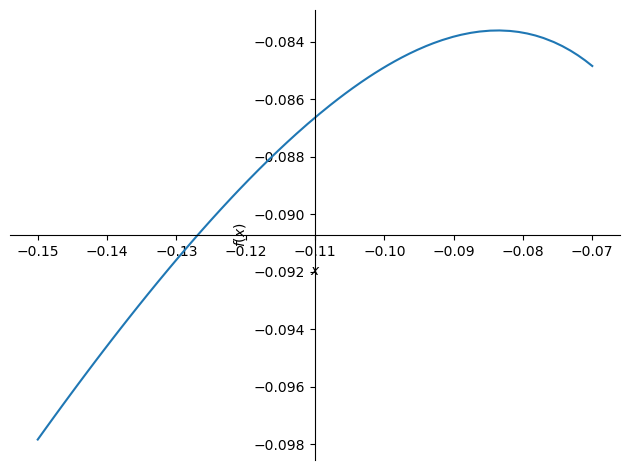

In [140]:
plot(G[0].evalf(subs={y:0.1}),  (x, -0.15, -0.07))

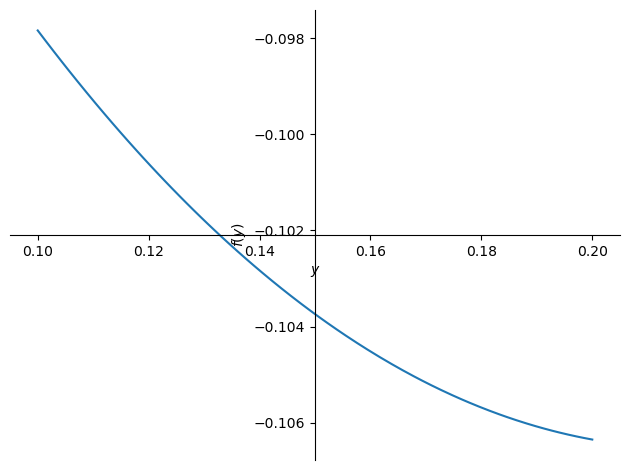

In [141]:
plot(G[0].evalf(subs={x:-0.15}),  (y, 0.1, 0.2))

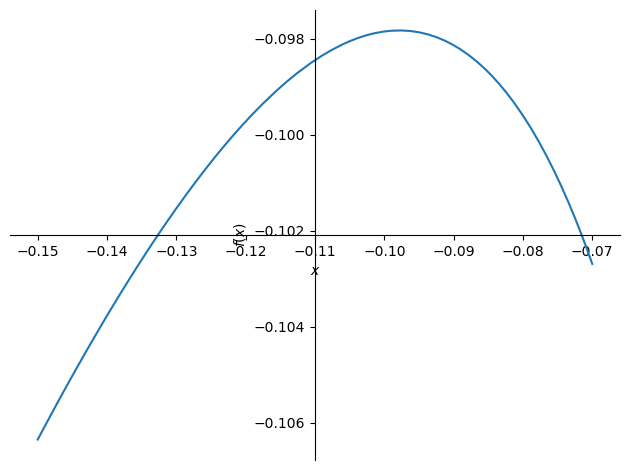

In [142]:
plot(G[0].evalf(subs={y:0.2}),  (x, -0.15, -0.07))

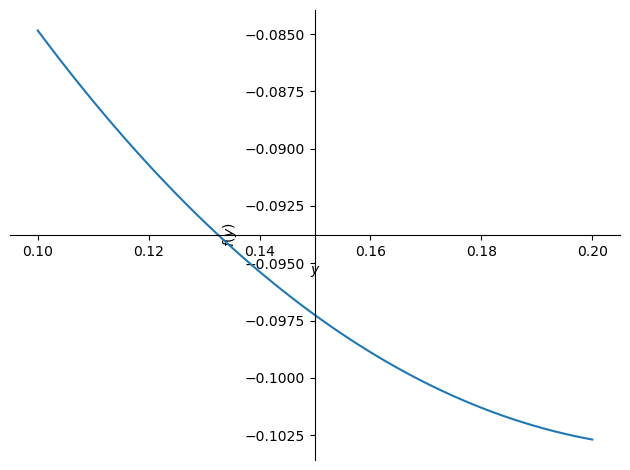

In [143]:
plot(G[0].evalf(subs={x:-0.07}),  (y, 0.1, 0.2))

In [119]:
G[0].evalf(subs={x:-0.08, y:0.225})

-0.0999503990105431

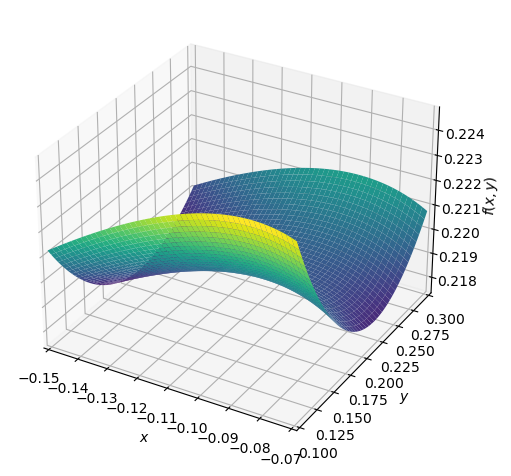

In [146]:
plot3d(G[1], (x, -0.15, -0.07), (y, 0.1, 0.3))

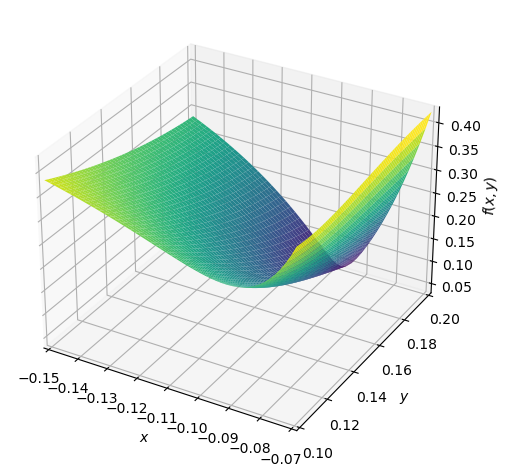

In [133]:
plot3d(G.jacobian([x,y]).norm('fro'),  (x, -0.15, -0.07), (y, 0.1, 0.2))

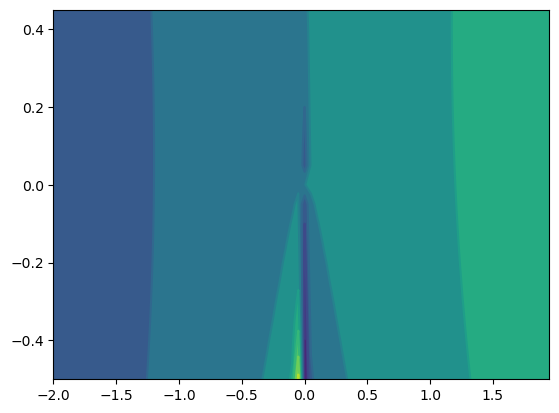

In [59]:
plt.contour(X, Y, G1(X, Y))
plt.contourf(X, Y, G1(X, Y))
plt.show()

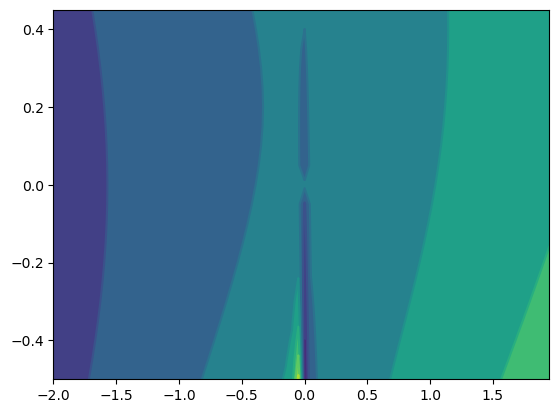

In [60]:
plt.contour(X, Y, G2(X, Y))
plt.contourf(X, Y, G2(X, Y))
plt.show()

In [112]:
DG = G.jacobian([x, y])

Matrix([
[                                                                                                          -10*x*(sin(y) + 4)/(10*x*sin(y) + 40*x - 2*y*cos(x)) - y*(4*y - sin(x) - cos(y))*(-y*sin(x) - 5*sin(y) - 20)/(5*x*sin(y) + 20*x - y*cos(x))**2 + y*cos(x)/(5*x*sin(y) + 20*x - y*cos(x)) - (5*x**2 - y**2)*(sin(y) + 4)*(-2*y*sin(x) - 10*sin(y) - 40)/(10*x*sin(y) + 40*x - 2*y*cos(x))**2 + 1, -y*(-5*x*cos(y) + cos(x))*(4*y - sin(x) - cos(y))/(5*x*sin(y) + 20*x - y*cos(x))**2 + 2*y*(sin(y) + 4)/(10*x*sin(y) + 40*x - 2*y*cos(x)) - y*(sin(y) + 4)/(5*x*sin(y) + 20*x - y*cos(x)) - (5*x**2 - y**2)*(-10*x*cos(y) + 2*cos(x))*(sin(y) + 4)/(10*x*sin(y) + 40*x - 2*y*cos(x))**2 - (5*x**2 - y**2)*cos(y)/(10*x*sin(y) + 40*x - 2*y*cos(x)) - (4*y - sin(x) - cos(y))/(5*x*sin(y) + 20*x - y*cos(x))],
[-5*x*(4*y - sin(x) - cos(y))*(-y*sin(x) - 5*sin(y) - 20)/(5*x*sin(y) + 20*x - y*cos(x))**2 - 10*x*cos(x)/(10*x*sin(y) + 40*x - 2*y*cos(x)) + 5*x*cos(x)/(5*x*sin(y) + 20*x - y*cos(x)) + (5*x**2 - y*

In [9]:
g =  lambdify([x, y], G)
g(1, 1)

array([[0.48024079],
       [0.40120393]])

In [57]:
x = -1
y = -1

xs = [x]
ys = [y]

r = g(x, y)
a = r[0][0]
b = r[1][0]

xs.append(a)
ys.append(b)

i = 1

while True:
    if max(abs(xs[i]-xs[i-1]), abs(ys[i]-ys[i-1])) < 10**-6:
        break
    r = g(xs[i], ys[i])
    a = r[0][0]
    b = r[1][0]
    xs.append(a)
    ys.append(b)
    i += 1

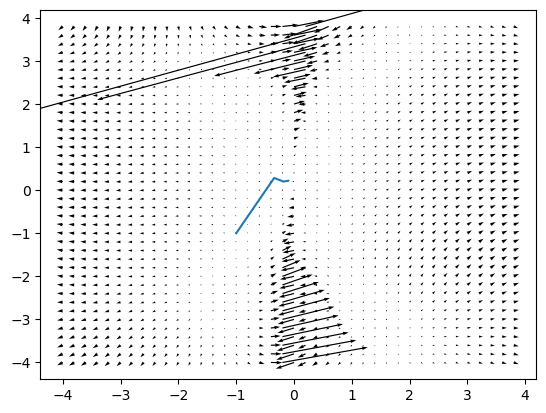

In [67]:
plt.figure()
plt.plot(xs, ys)
plt.quiver(X, Y, a, b)
plt.show()

In [63]:
ys

[-1,
 0.2833937390536979,
 0.19986317087528208,
 0.21522729556439701,
 0.21920262962550283,
 0.21949845913621857,
 0.21950013574673974,
 0.21950013580072267]

In [5]:
F.jacobian([x, y]).det()

10*x*sin(y) + 40*x - 2*y*cos(x)

In [27]:
from sympy.plotting import plot3d
f = u * v
fx = lambdify([x, y], diff(f, x))
fy = lambdify([x, y], diff(f, y))

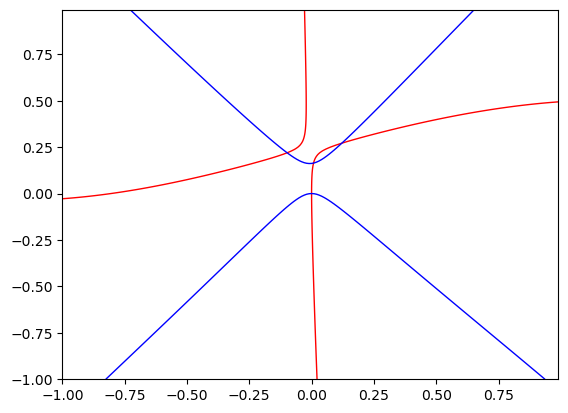

In [35]:
n= np.arange(-1, 1, 0.01)

Xs, Ys = np.meshgrid(n, n)

xs = fx(Xs, Ys)
ys = fy(Xs, Ys)

plt.contour(Xs, Ys, xs ,0, colors="red", linewidths=1)
plt.contour(Xs, Ys, ys ,0, colors="blue",  linewidths=1)
plt.show()